<div align="center">
    <h5>DATA PRE-PROCESSING</h5>
</div>


In [15]:
import pandas as pd
import ydata_profiling as pp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

# Load the dataset
data = pd.read_csv("customer_booking.csv", encoding='iso-8859-1')

#Pandas Profile
profile = pp.ProfileReport(data)
profile.to_file("data_pandas_profile.html")

# Define the features X and target variable y
X = data.drop('booking_complete', axis=1)
y = data['booking_complete']

# Columns to drop that are not relevant to this analysis
columns_to_drop = ['num_passengers', 'sales_channel', 'trip_type', 'flight_day', 'booking_origin', 'route']

# Dropped columns
X_cleaned = X.drop(columns_to_drop, axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42)

# Scale the features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<div align="center">
    <h5>FEATURE SELECTION</h5>
</div>


In [4]:
# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Feature importances from the model
feature_importances = model.coef_[0]

# Dataframe for feature importances
importance_df = pd.DataFrame({'Feature': X_cleaned.columns, 'Importance': feature_importances})

# Sort the dataframe by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Top 5 important features
top_features = importance_df.head(5)['Feature']


<div align="center">
    <h5>MODEL EVALUATION</h5>
</div>


In [5]:
# XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)

# Predictions using the XGBoost model
xgb_predictions = xgb_model.predict(X_test_scaled)

# Accuracy Calculation
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)


XGBoost Accuracy: 0.8512


<div align="center">
    <h5>FEATURE IMPORTANCE VISUALIZATION</h5>
</div>


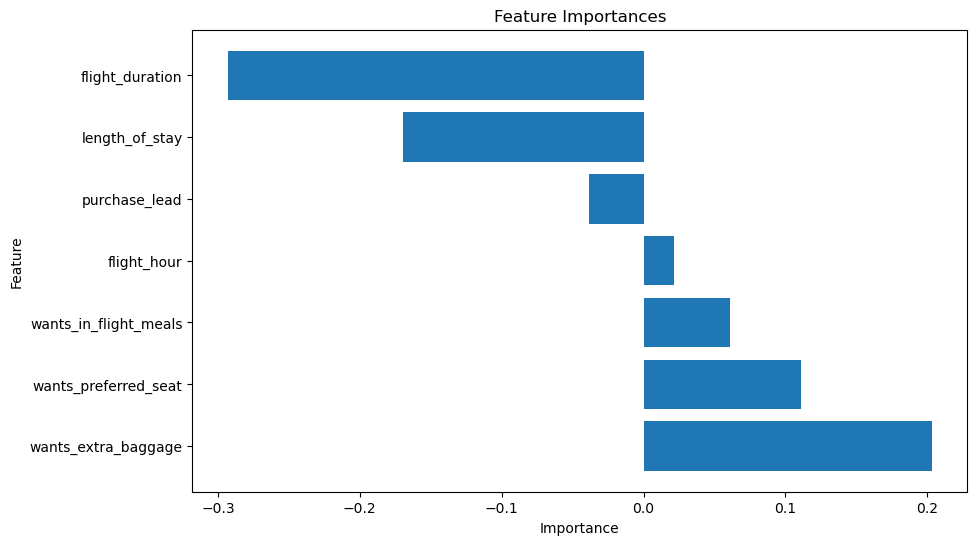

Top 5 Important Features:
1. wants_extra_baggage
2. wants_preferred_seat
3. wants_in_flight_meals
4. flight_hour
5. purchase_lead


In [6]:
# Bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# Top 5 important features
print("Top 5 Important Features:")
for rank, feature in enumerate(top_features, start=1):
    print(f"{rank}. {feature}")


<div align="center">
    <h5>EXPLANATION ON TOP 5 IMPORTANT FEATURES</h5>
</div>


1. **Extra baggage preference:**
   Passengers who want more baggage when they travel are more likely to book a holiday ticket with British Airways. This means that having the option for extra baggage is attractive to passengers who are considering the airline.

2. **Preferred seating preference:**
   Passengers who want specific seats with more legroom or closer to amenities are more likely to book a holiday ticket. This shows that being able to choose preferred seats is important in the decision-making process.

3. **In-flight meal preference:**
   Passengers who want to have meals during their flight are more likely to book a holiday ticket. This highlights the importance of having meal options available for passengers.

4. **Flight timing:**
   The time of the flight is important in the decision to book a ticket. Passengers are more likely to book flights at certain times that fit their schedules and preferences.

5. **Purchase lead time:**
   The time between buying a ticket and the travel date is important. Passengers who plan and book in advance are more likely to complete their booking.

Overall, these features show that passenger preferences for baggage, seating, meals, flight timing, and purchase lead time are important in the decision to book a holiday ticket with British Airways.